In [81]:
from __future__ import absolute_import, division, print_function
import pathlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

dataset_path = keras.utils.get_file("auto-mpg.data","https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration',
               'Model Year','Origin']
raw_dataset=pd.read_excel("OTV_Data.xlsx")

dataset = raw_dataset.copy()
dataset.isna().sum()

experiment = pd.DataFrame()

#the first dependent variable
experiment['EpiT_Avg_R']=dataset['EpiT_Avg_R']
experiment['EpiT_Avg_R'] = pd.to_numeric(experiment['EpiT_Avg_R'],errors='coerce')

#the first independent variable
experiment['cpt3_c_T'] = dataset['cpt3_c_T']
experiment['cpt3_c_T'] = pd.to_numeric(experiment['cpt3_c_T'],errors='coerce')

# experiment['cpt3_dpr_T'] = dataset['cpt3_dpr_T']
# experiment['cpt3_dpr_T'] = pd.to_numeric(experiment['cpt3_dpr_T'],errors='coerce')

# experiment['cpt3_omi_T'] = dataset['cpt3_omi_T']
# experiment['cpt3_omi_T'] = pd.to_numeric(experiment['cpt3_omi_T'],errors='coerce')

# experiment['cpt3_com_T'] = dataset['cpt3_com_T']
# experiment['cpt3_com_T'] = pd.to_numeric(experiment['cpt3_com_T'],errors='coerce')

# experiment['cpt3_prs_T'] = dataset['cpt3_prs_T']
# experiment['cpt3_prs_T'] = pd.to_numeric(experiment['cpt3_prs_T'],errors='coerce')

# experiment['cpt3_hrt_T'] = dataset['cpt3_hrt_T']
# experiment['cpt3_hrt_T'] = pd.to_numeric(experiment['cpt3_hrt_T'],errors='coerce')

# experiment['cpt3_hrtsd_T'] = dataset['cpt3_hrtsd_T']
# experiment['cpt3_hrtsd_T'] = pd.to_numeric(experiment['cpt3_hrtsd_T'],errors='coerce')

# experiment['cpt3_var_T'] = dataset['cpt3_var_T']
# experiment['cpt3_var_T'] = pd.to_numeric(experiment['cpt3_var_T'],errors='coerce')

# experiment['cpt3_blkch_T'] = dataset['cpt3_blkch_T']
# experiment['cpt3_blkch_T'] = pd.to_numeric(experiment['cpt3_blkch_T'],errors='coerce')

# experiment['cpt3_isich_T'] = dataset['cpt3_isich_T']
# experiment['cpt3_isich_T'] = pd.to_numeric(experiment['cpt3_isich_T'],errors='coerce')

# temp_name = 'age'
# experiment[temp_name] = dataset[temp_name]
# experiment[temp_name] = pd.to_numeric(experiment[temp_name],errors='coerce')

experiment = experiment.dropna()
experiment = experiment.drop(experiment[experiment['cpt3_c_T']>900].index)
# sns.pairplot(experiment)

# plt.plot(experiment['cpt3_dpr_T'],experiment['EpiT_Avg_R'])
# plt.show()

# sns.pairplot(experiment[['EpiT_Avg_R', 'cpt3_c_T', 'cpt3_dpr_T','cpt3_omi_T', 'cpt3_com_T']],diag_kind="kde")

#training and testing dataset
train_dataset = experiment.sample(frac=0.8, random_state=0)
test_dataset = experiment.drop(train_dataset.index)

train_stats = train_dataset.describe()
train_stats.pop('EpiT_Avg_R')
train_stats = train_stats.transpose()

train_labels = train_dataset.pop('EpiT_Avg_R')
test_labels = test_dataset.pop('EpiT_Avg_R')

#normalize the data
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)






,cpt3_c_T
47,-1.640744
64,0.193427
7,-0.723659
54,-0.265116
70,-0.112269
...,...
52,0.728393
133,2.409716
106,-0.647235
87,-0.341540


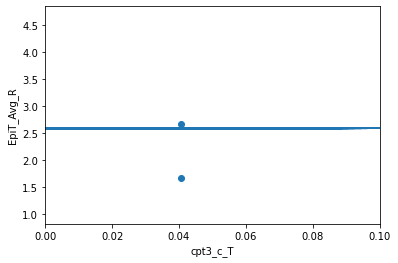

In [82]:

import numpy as np

normed_train_data = normed_train_data
plt.scatter(normed_train_data['cpt3_c_T'],train_labels)
plt.xlabel('cpt3_c_T')
plt.ylabel('EpiT_Avg_R')
plt.xlim([0,0.1])


m, b = np.polyfit(normed_train_data['cpt3_c_T'], train_labels, 1)
plt.plot(normed_train_data['cpt3_c_T'], m*normed_train_data['cpt3_c_T'] + b)



In [ ]:

# building the model
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae','mse', 'accuracy'])
    
    return model


model = build_model()
# model.summary()

In [155]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if epoch%100==0: print('')
        print('.',end='')
        
EPOCHS=1000




In [156]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [157]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Average]')
    plt.plot(hist['epoch'],hist['mae'],
            label='Train Error')
    plt.plot(hist['epoch'],hist['val_mae'],
            label='Val Error')
    plt.legend()
    plt.ylim([0,5])
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'],hist['mse'],
            label='Train Error')
    plt.plot(hist['epoch'],hist['val_mse'],
            label='Val Error')
    plt.legend()
    plt.ylim([0,20])
    



................................

[313.75335693359375,
 4.157550811767578,
 313.75335693359375,
 0.06896551698446274]

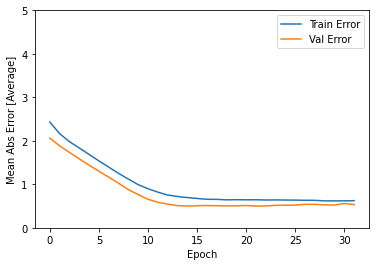

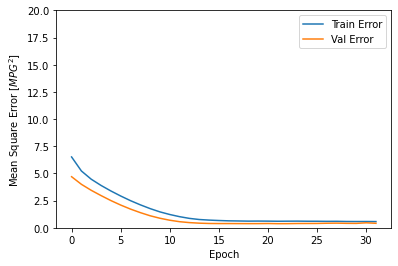

In [158]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[early_stop, PrintDot()])

plot_history(history)
score= model.evaluate(normed_test_data, test_labels, verbose=0)
# print("Accuracy: ",score[1])
score


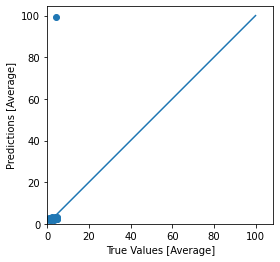

In [159]:
test_predictions = model.predict(normed_test_data).flatten()
plt.scatter(test_labels,test_predictions)
plt.xlabel('True Values [Average]')
plt.ylabel('Predictions [Average]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100,100],[-100,100])

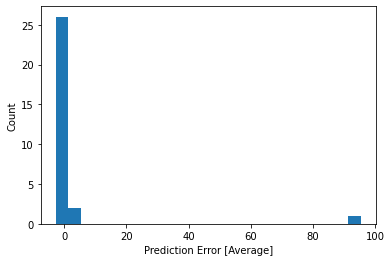

In [160]:
error = test_predictions - test_labels
plt.hist(error,bins=25)
plt.xlabel("Prediction Error [Average]")
_ = plt.ylabel("Count")

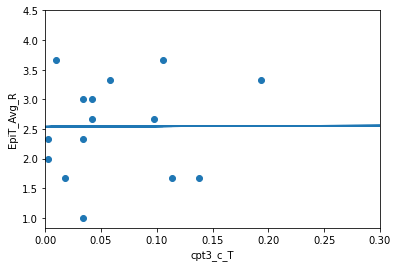

In [161]:

plt.scatter(normed_train_data['cpt3_c_T'],train_labels)
plt.xlabel('cpt3_c_T')
plt.ylabel('EpiT_Avg_R')
plt.xlim([0,0.3])


m, b = np.polyfit(normed_train_data['cpt3_c_T'], train_labels, 1)
plt.plot(normed_train_data['cpt3_c_T'], m*normed_train_data['cpt3_c_T'] + b)

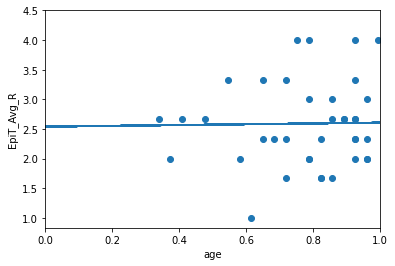

In [168]:
# experiment['cpt3_isich_T'] = dataset['cpt3_isich_T']
# experiment['cpt3_isich_T'] = pd.to_numeric(experiment['cpt3_isich_T'],errors='coerce')

cname = 'age'
plt.scatter(normed_train_data[cname],train_labels)
plt.xlabel(cname)
plt.ylabel('EpiT_Avg_R')
plt.xlim([0,1])


m, b = np.polyfit(normed_train_data[cname], train_labels, 1)
plt.plot(normed_train_data[cname], m*normed_train_data[cname] + b)

